# Import Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

# Import dataset

In [3]:
df = pd.read_csv("Train.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Preprocessing Text Data

In [6]:
# now check shape
df.shape

(40000, 2)

In [7]:
# now to select first 10000 dataset
df = df.iloc[:10000,:]

In [8]:
df.shape

(10000, 2)

In [10]:
# Now check the lable
df['label'].value_counts()

label
0    5043
1    4957
Name: count, dtype: int64

<Axes: xlabel='label'>

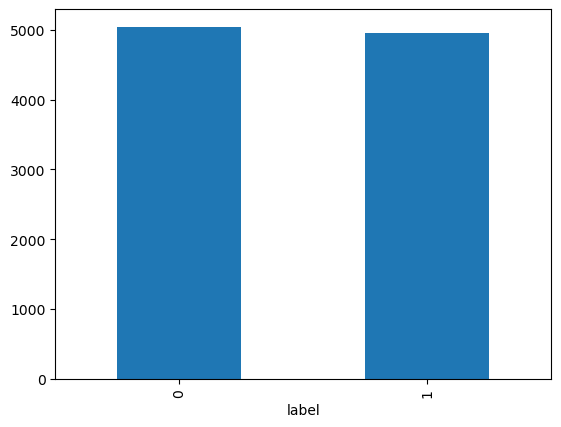

In [11]:
# To check in graph
df['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

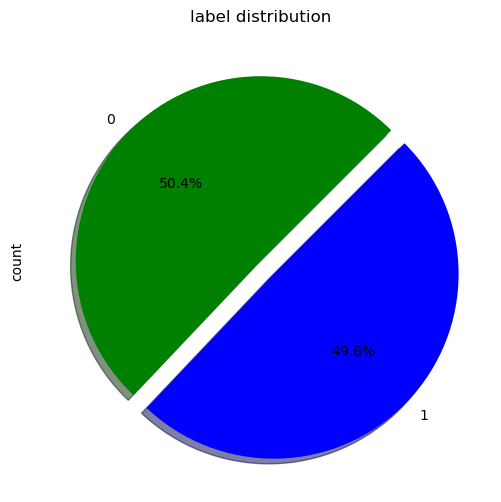

In [12]:
plt.figure(figsize=(10,6))
colors = ['green', 'blue']
df['label'].value_counts().plot(kind='pie',autopct='%.1f%%', shadow=True, colors=colors, startangle=45,
                               explode=(0, 0.1))
plt.title('label distribution')

# Cleaning Steps

In [13]:
# Working with text
df['text'][999]

'...but I regret having seen it. Since the ratings on IMDb are relatively high (and they must also have been relatively high on Netflix), I guess I put it in my queue because it is advertised as a gentle comedy from the UK, a category that has produced many films I liked immensely. "Saving Grace," on the other hand, falls into the category of laugh-less comedies usually populated by Hollywood movies produced and directed by the talentless. Brenda Blethyn is a capable actress, and I have liked her in other movies. The concept -- a gardener growing marijuana to overcome the penury she finds herself confronting after her husband\'s death -- does not offend me. Notwithstanding the strenuous efforts on the part of the cast to produce humor, the film falls flat on its face (falling flat on its arse might have been funnier) as far as I and my wife were concerned. Be forewarned, oh gentle reader, not all offbeat British comedies succeed. This one is a dud.'

In [15]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [17]:
# test the preprocessing
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [19]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))
df['text']

0       grew b 1965 watch love thunderbird mate school...
1       put movi dvd player sat coke chip expect hope ...
2       peopl know particular time past like feel need...
3       even though great interest biblic movi bore de...
4       im die hard dad armi fan noth ever chang got t...
                              ...                        
9995    one cerebr insight movi ever seen script langu...
9996    first movi near complet guess someon actual bo...
9997    said movi cross dress gangster much averag ind...
9998    like adult comedi cartoon like south park near...
9999    well start straighthead present bit dilemma fi...
Name: text, Length: 10000, dtype: object

# Visualizing Negative and Positive Words

In [21]:
positivedata = df[df['label'] == 1]
positivedata = positivedata['text']
negdata = df[df['label'] == 0]
negdata = negdata['text']

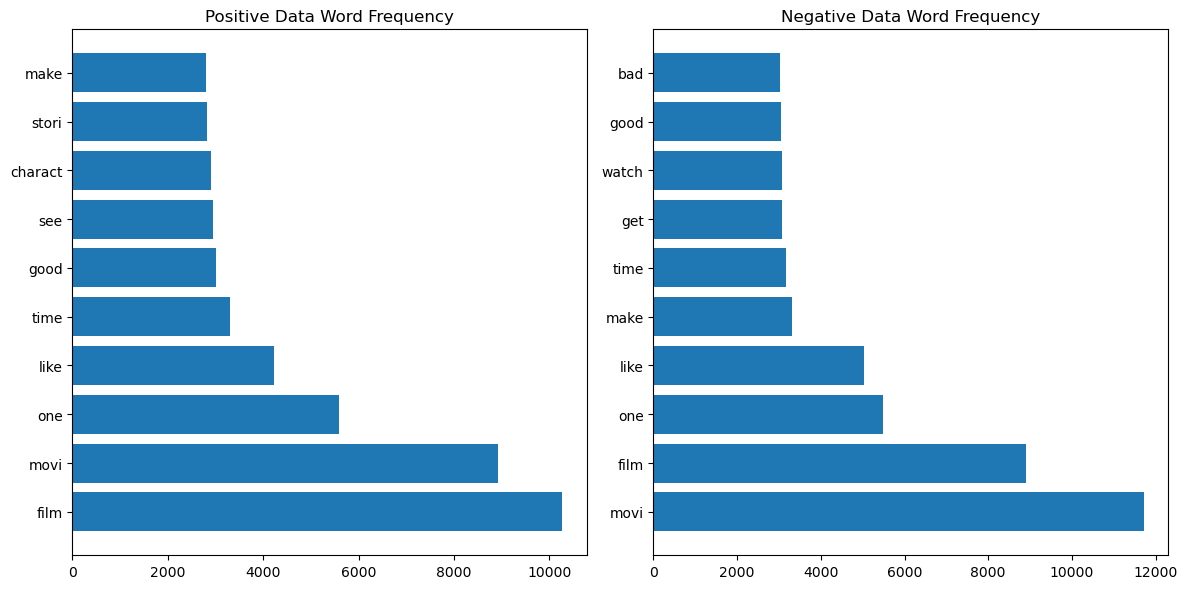

In [22]:
# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

# TF-IDF Vertorizer to convert the raw documents into feature matrix

In [25]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

# Training Machine Learning Model for Sentiment Analysis

Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [30]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   14.5s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   21.7s finished


# Accuracy

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8756


# prediction

In [34]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction

prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [35]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

positive comment


# Pickle files

In [36]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))